In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter



# def histogram(data=[], title="", xlabel="None", ylabel="None",
#                    labels=None, bins=None, width=None, alpha=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     plt.hist(data, rwdith=width, bins=bins, alpha=alpha, label=labels)
#     plt.savefig(title+".pdf")
#     plt.show()

# def line_plot(x=[], y=[], title="", xlabel="None", ylabel="None",
#                    log_xscale=True, ylim=None, labels=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     if log_xscale:
#         plt.xscale('log')

#     if ylim:
#         bottom,top=ylim
#         plt.ylim(bottom=bottom, top=top)

#     if isinstance(y[0],list):
#         for i in range(len(y)):
#             plt.plot(x,y[i],label=labels[i])
#         plt.legend()
#     else:
#         plt.plot(x,y)
#     plt.savefig(title+".pdf")
#     plt.show()

# def scatter_plot(x=[], y=[], z=[] title="", xlabel="None", ylabel="None", zlabel="None",
#                    log_xscale=True, log_yscale=False, ylim=None, labels=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     if log_xscale:
#         plt.xscale('log')

#     if log_yscale:
#         plt.yscale('log')

#     if ylim:
#         bottom,top=ylim
#         plt.ylim(bottom=bottom, top=top)

#     sc=[plt.scatter(x,y,c=z,cmap=cm, s=150)]

#     plt.savefig(title+".pdf")
#     plt.show()

In [9]:
def line_plot(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/'+fileName+'.csv')
    print(df)
    
    df['FilterType'] = df['FilterType'].astype(str)
    bloom = df[df['FilterType'] == 'Bloom']
    cuckoo = df[df['FilterType'] == 'Cuckoo']
    xor = df[df['FilterType'] == 'Xor']
    blockedbloom = df[df['FilterType'] == 'Blocked Bloom']
    theory = df[df['FilterType'] == 'Lower Bound']

    if iter:
        bloom = bloom.groupby(x)[y].mean().reset_index()
        cuckoo = cuckoo.groupby(x)[y].mean().reset_index()
        xor = xor.groupby(x)[y].mean().reset_index()
        blockedbloom = blockedbloom.groupby(x)[y].mean().reset_index()
    
    print(df['FilterType'].unique())
    plt.figure()

    if xscale:
        plt.xscale('log')
    
    plt.plot(bloom[x], bloom[y], label='BloomFilter')
    plt.plot(cuckoo[x], cuckoo[y], label='CuckooFilter')
    plt.plot(blockedbloom[x], blockedbloom[y], label='BlockedBloomFilter')
    plt.plot(xor[x], xor[y], label='XORFilter')
    if bound:
        plt.plot(theory[x], theory[y], label='Lower Bound', linestyle = '--')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)
    plt.legend()
    
    plt.savefig("./out/"+ fileName + ".pdf")
    
    plt.show()

     FilterType          n     fpr        bpi  iteration
0         Bloom  1000000.0  0.0001  19.170176         -1
1        Cuckoo  1000000.0  0.0001  18.085106         -1
2           Xor  1000000.0  0.0001  17.220448         -1
3   Lower Bound  1000000.0  0.0001  13.287712         -1
4         Bloom  1000000.0  0.0010  14.377600         -1
5        Cuckoo  1000000.0  0.0010  13.829787         -1
6           Xor  1000000.0  0.0010  12.300320         -1
7   Lower Bound  1000000.0  0.0010   9.965784         -1
8         Bloom  1000000.0  0.0100   9.585088         -1
9        Cuckoo  1000000.0  0.0100  10.638298         -1
10          Xor  1000000.0  0.0100   8.610224         -1
11  Lower Bound  1000000.0  0.0100   6.643856         -1
12        Bloom  1000000.0  0.1000   4.792576         -1
13       Cuckoo  1000000.0  0.1000   7.446809         -1
14          Xor  1000000.0  0.1000   4.920128         -1
15  Lower Bound  1000000.0  0.1000   3.321928         -1
['Bloom' 'Cuckoo' 'Xor' 'Lower 

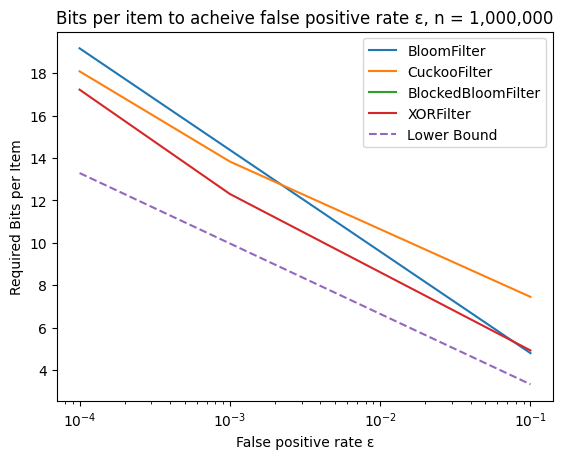

In [10]:
line_plot(fileName="bpi_fpr", x="fpr", y="bpi", figureName='Bits per item to acheive false positive rate ε, n = 1,000,000', 
          xscale=True, xlabel="False positive rate ε", ylabel="Required Bits per Item", bound=True)

# line_plot(fileName="buildTime_n", x="n", y="constTime", figureName='Construction time in terms of number of keys', 
#           xscale=True, xlabel="Number of Keys Inserted", ylabel="Construction time per key (ns)")



       FilterType           n    constTime   fpr  iteration
0           Bloom     10000.0    30.254200  0.01          1
1          Cuckoo     10000.0   478.125000  0.01          1
2   Blocked Bloom     10000.0   151.504200  0.01          1
3           Bloom     10000.0    44.616700  0.01          2
4          Cuckoo     10000.0  1148.862500  0.01          2
5   Blocked Bloom     10000.0   100.712500  0.01          2
6           Bloom     10000.0    40.195800  0.01          3
7          Cuckoo     10000.0   531.762500  0.01          3
8   Blocked Bloom     10000.0    41.191600  0.01          3
9           Bloom     10000.0    31.345800  0.01          4
10         Cuckoo     10000.0   488.783400  0.01          4
11  Blocked Bloom     10000.0    42.612500  0.01          4
12          Bloom     10000.0    31.000000  0.01          5
13         Cuckoo     10000.0   468.695900  0.01          5
14  Blocked Bloom     10000.0    46.362500  0.01          5
15          Bloom    100000.0    31.1583

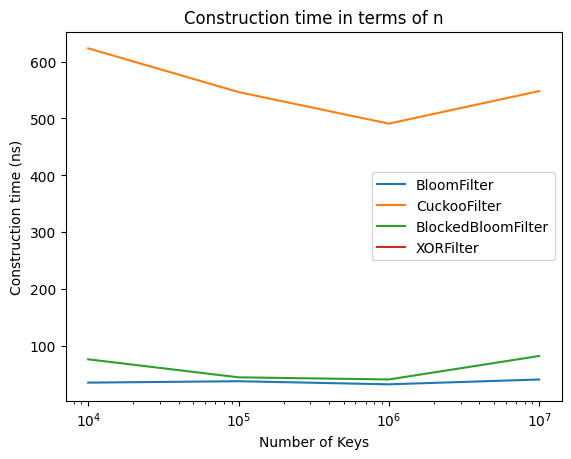

In [11]:
line_plot(fileName="buildTime_n", x="n", y="constTime", figureName='Construction time in terms of n', 
          xscale=True, xlabel="Number of Keys", ylabel="Construction time (ns)", iter=True, bound=False)